In [1]:
#Pakker til at køre scriptet

import numpy as np
import matplotlib.pyplot as plt
!pip install netCDF4
from netCDF4 import Dataset
import pandas as pd
from matplotlib.colors import Normalize

In [2]:
#Vi henter temperatur, højde og hastigheds data over Golfstømmen og Atlanterhavet fra Copernicus Marine Service, MyOceanPro.
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/MyDrive/Colab Notebooks/FysikCamp2025/Raket og Jordobservationer/Havstrømme/Havstrømme/"
file_temp = 'Temperatur_Golf_01012024_month.nc'
file_vel = 'Vel_Golf_01012024_month.nc'
file_h = 'H_Golf_01012024_month.nc'

#Hent dataen fra netcdf filen. Temperatur
#Daten er fra fra 0,5 meter dybde. Med 1/12 graders opløsning.
#Dataen er fra et måneds gennemsnit fra den 1. januar
data_temp= Dataset(path+file_temp, 'r')
#print(data_temp.variables.keys())
temp= data_temp.variables['thetao'][:][0][0]
lat = data_temp.variables['latitude'][:]
lon = data_temp.variables['longitude'][:]
data_temp.close()
#Hastighedsdata
data_vel= Dataset(path+file_vel, 'r')
#print(data_vel.variables.keys())
has_øst = data_vel.variables['uo'][:][0][0]
has_nord = data_vel.variables['vo'][:][0][0]
lon_vel = data_vel.variables['longitude'][:]
lat_vel = data_vel.variables['latitude'][:]
data_vel.close()
#Højde data
data_h = Dataset(path+file_h, 'r')
#print(data_h.variables.keys())
h= data_h.variables['zos'][:][0]
print(h.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(766, 1290)


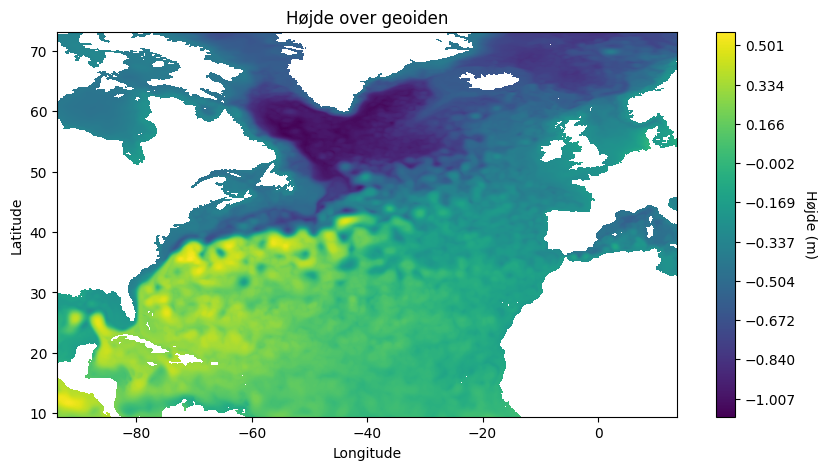

In [3]:
#Højde SSH over geioden plot.
plt.figure(figsize=(10, 5))
levels = np.linspace(h.min(), h.max(), 256)  # Create 256 levels for smooth color transitions
norm = Normalize(vmin=h.min(), vmax=h.max())  # Normalize based on data range
plt.contourf(lon, lat, h, levels=levels, cmap='viridis', norm=norm)
cbar = plt.colorbar(label='Højde (m)')
cbar.ax.set_ylabel('Højde (m)', rotation=270, labelpad=15)  # Improve colorbar label formatting
plt.title('Højde over geoiden')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

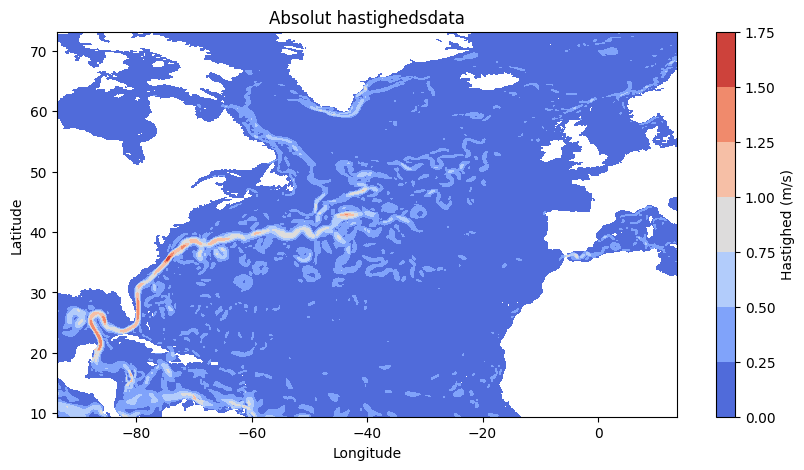

In [4]:
#Plot den absolutte hastighed
abs_has_model= np.sqrt(has_øst**2 + has_nord**2)

plt.figure(figsize=(10, 5))
plt.contourf(lon, lat, abs_has_model, cmap='coolwarm')
plt.colorbar(label='Hastighed (m/s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Absolut hastighedsdata')
plt.show()


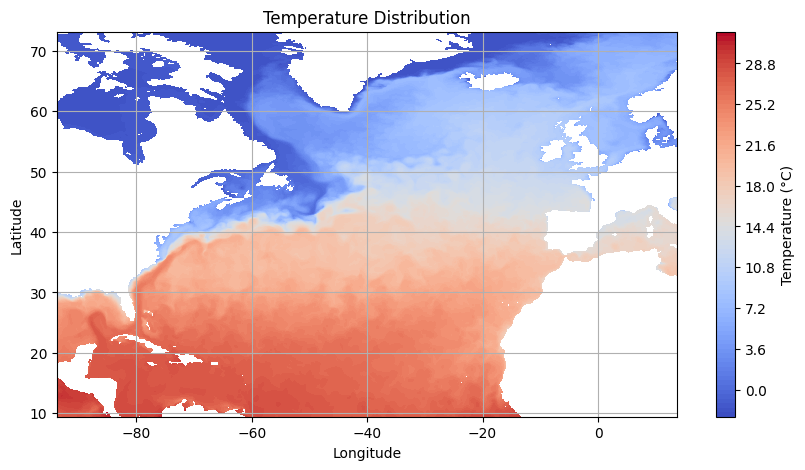

In [9]:
#Temperatur plot.
plt.figure(figsize=(10, 5))
plt.contourf(lon, lat, temp,levels=100, cmap='coolwarm')
plt.colorbar(label='Temperature (°C)')
plt.title('Temperature Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

# Opgaven

## Hastighed udfra højdedataen

Hastigheden af flowet V=(u,v), u er øst-vest hastigheden og v er nord-syd hastigheden.

$u=-\frac{1}{f*\rho_0}\frac{\partial P}{\partial y}$

$v=\frac{1}{f*\rho_0}\frac{\partial P}{\partial x}$

Navier-Stokes strømnings ligninger kan reduceres via antagelser til kun at være afhæning af jordensrotation, og trykforskel.

Trykforskellen kan nogenlunde udregnes udfra højdedata havoverfladen, iforhold til den teoretiske højde.
SSH=($\eta$)

$u=-\frac{g}{f}\frac{\Delta \eta}{\Delta y }$

$v=\frac{g}{f}\frac{\Delta \eta}{\Delta x }$

Vi udskifter $\partial$ med $\Delta$, da vores data ikke har uendelig mange data punkter, men en resulation på 1/12 grad.

Altså istedet for en uendelig lille ændring i x, bruger vi en ændring $\Delta x$ og $\Delta y$=9260 meter.

In [6]:
# Geografisk område
lat_subset = lat[lat <= 45]
lon_subset = lon[lon <= -40]
h_subset = h[:len(lat_subset),:len(lon_subset)]
# Konverter lat og lon til meter
h_subset = np.array(h_subset, dtype=object)
h_subset = np.where(h_subset == '--', 999, h_subset).astype(float)

## Lav nu hastigheds beregninger basseret på den geostrofiske balance (u og v)

In [7]:
# Jeg vil anbefale et "for loop"
#Kald hastigheden for ssh_u og ssh_v





#Her efter udregn den absolutte hastighed.
#abs_has_ssh=
#abs_has_model

## Kør resten af koden som plotter hastighederne

In [8]:
abs_has_col = np.nan_to_num(abs_has_ssh, nan=0)  # Replace NaN with 0.0
abs_has_model_col = np.nan_to_num(abs_has_model, nan=0)  # Replace NaN with 0.0
vmin = min(abs_has_col.min(), abs_has_model_col.min())
vmax = max(abs_has_col.max(), abs_has_model_col.max())

# Create a figure with two subplots stacked vertically
fig, axes = plt.subplots(2, 1, figsize=(8, 12), sharex=True)

# Plot abs_has in the first subplot
im1 = axes[0].contourf(
    lon_subset[:len(lon_subset)-1],
    lat_subset[:len(lat_subset)-1],
    abs_has_ssh,
    cmap='coolwarm',
    vmin=vmin,
    vmax=vmax
)
axes[0].set_title('Hastighed absolut fra SSH')
axes[0].set_ylabel('Latitude')

# Plot abs_has_model in the second subplot


im2 = axes[1].contourf(
    lon_subset[:len(lon_subset)-1],
    lat_subset[:len(lat_subset)-1],
    abs_has_model[:len(lat_subset)-1, :len(lon_subset)-1],
    cmap='coolwarm',
    vmin=vmin,
    vmax=vmax
)
axes[1].set_title('Hastighed absolut fra model')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

# Adjust layout to make space for the colorbar
plt.subplots_adjust(right=0.85)  # Shrink the plot area to make space on the right

# Add a single shared colorbar
cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(im1, cax=cbar_ax, label='Hastighed (m/s)')

# Show the plots
plt.show()



NameError: name 'abs_has_ssh' is not defined

## Super!

Nu er de sidste to koder til at plotte med en retning på havstrømmen.

Den første er lavet af ssh og den anden er den korrekte model.


In [ ]:
# Plotting
plt.figure(figsize=(10, 5))

# Plot the absolute velocity as a contour plot
plt.contourf(lon_subset[:len(lon_subset) - 1], lat_subset[:len(lat_subset) - 1], abs_has_ssh, cmap='coolwarm')
plt.colorbar(label='hastighed (m/s)')
plt.title('Hastighed absolut fra SSH med vektorer')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Downsample the data for fewer arrows
step = 6  # Adjust this value to control the density of arrows
lon_downsampled = lon_subset[:len(lon_subset) - 1:step]
lat_downsampled = lat_subset[:len(lat_subset) - 1:step]

# Compute the mean velocity components for each step block
ssh_u_mean = np.zeros((len(lat_downsampled), len(lon_downsampled)))
ssh_v_mean = np.zeros((len(lat_downsampled), len(lon_downsampled)))
for i in range(len(lat_downsampled)):
    for j in range(len(lon_downsampled)):
        ssh_u_mean[i, j] = np.mean(ssh_u[i * step:(i + 1) * step, j * step:(j + 1) * step])
        ssh_v_mean[i, j] = np.mean(ssh_v[i * step:(i + 1) * step, j * step:(j + 1) * step])

# Compute the mean absolute velocity for masking
abs_has_mean = np.sqrt(ssh_u_mean**2 + ssh_v_mean**2)

# Create a mask for velocities greater than 0.3
mask = abs_has_mean > 0.3

# Apply the mask to the mean velocity components
ssh_u_masked = np.where(mask, ssh_u_mean, 0)
ssh_v_masked = np.where(mask, ssh_v_mean, 0)
ss=np.zeros((len(lat_downsampled), len(lon_downsampled)))
# Plot the masked vectors with increased length (scale reduced to make vectors longer)
plt.quiver(
    lon_downsampled,
    lat_downsampled,
    ssh_u_masked,
    ssh_v_masked,
    color='black',
    scale=40,  # Reduce scale to make vectors twice as long
    width=0.002
)

plt.show()

In [ ]:
# Plot MyOceanpro Model med vektorer for at vise retningen af strømmen
model_u = has_øst[:len(lat_subset) - 1, :len(lon_subset) - 1]
model_v = has_nord[:len(lat_subset) - 1, :len(lon_subset) - 1]


# Compute absolute velocity
abs_has_model = np.sqrt(model_u**2 + model_v**2)

# Plotting
plt.figure(figsize=(10, 5))

# Plot the absolute velocity as a contour plot
plt.contourf(lon_subset[:len(lon_subset) - 1], lat_subset[:len(lat_subset) - 1], abs_has_model, cmap='coolwarm')
plt.colorbar(label='hastighed (m/s)')
plt.title('Hastighed fra model med vektorer')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Downsample the data for fewer arrows
step = 6  # Adjust this value to control the density of arrows
lon_downsampled = lon_subset[:len(lon_subset) - 1:step]
lat_downsampled = lat_subset[:len(lat_subset) - 1:step]

# Compute the mean velocity components for each step block
model_u_mean = np.zeros((len(lat_downsampled), len(lon_downsampled)))
model_v_mean = np.zeros((len(lat_downsampled), len(lon_downsampled)))
for i in range(len(lat_downsampled)):
    for j in range(len(lon_downsampled)):
        model_u_mean[i, j] = np.mean(model_u[i * step:(i + 1) * step, j * step:(j + 1) * step])
        model_v_mean[i, j] = np.mean(model_v[i * step:(i + 1) * step, j * step:(j + 1) * step])

# Compute the mean absolute velocity for masking
abs_has_model_mean = np.sqrt(model_u_mean**2 + model_v_mean**2)

# Create a mask for velocities greater than 0.3
mask = abs_has_model_mean > 0.3

# Apply the mask to the mean velocity components
model_u_masked = np.where(mask, model_u_mean, 0)
model_v_masked = np.where(mask, model_v_mean, 0)

# Plot the masked vectors with increased length (scale reduced to make vectors longer)
plt.quiver(
    lon_downsampled,
    lat_downsampled,
    model_u_masked,
    model_v_masked,
    color='black',
    scale=40,  # Reduce scale to make vectors twice as long
    width=0.002
)

plt.show()

##Ekstra Opgave
Lav et overslags regnestykke med varme energitransporten af golfstrømmen, estimer effekten.

"Hint" Bredden er cirka 120 km, dybden er cirka 200 m og vandtemperaturen er 2 grader varmer end uden for Golfstrømmen, og den specifikke varme kapasitet er $4200 J/(kg*C^o)$.\\

Hvor stor er denne effekt iforhold til et normalt kraftværk?

